# This project aims at predicting passengers survival in a car accident given characteristics like their age, genda and class.

In [ ]:
import os 
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [ ]:
df_train = pd.read_csv("train.csv") #training dataset
df_eval = pd.read_csv("eval.csv") #evaluation dataset
y_train = df_train.pop("survived")
y_eval = df_eval.pop("survived")

In [87]:
df_train.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [88]:
df_train.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [91]:
df_train.shape[0]
df_eval.shape[0]

264

[]

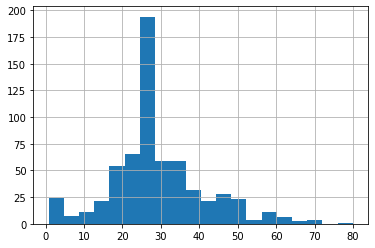

In [93]:
df_train.age.hist(bins=20).plot(kind="barh")

In [ ]:
df_train.sex.value_counts().plot(kind = "barh")

In [92]:
df_train["class"].value_counts()

Third     341
First     159
Second    127
Name: class, dtype: int64

In [ ]:
CATEGORICAL_COLUMNS = ["sex","n_siblings_spouses","parch","class","deck","embark_town","alone"]
NUMERIC_COLUMNS = ["age","fare"]

In [ ]:
feature_columns = [] # takes each value in CATEGORICAL_COLUMNS and returns it's content,dtype etc
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = df_train[feature_name].unique() # returns a list of all unique values in each feature column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))
    
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32)) # append the key fare to
    #feature_columns with dtype float32

# Creating: an input function is the way we define how our data is going to be broken into epoch and into batches to feed our model. 

In [ ]:
def create_input_function(data_df, labeled_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df),labeled_df))#returns a tf.data.Dataset object with data and its labels
        if shuffle:
            ds = ds.shuffle(1000)# randomize order of data
        ds = ds.batch(batch_size).repeat(num_epochs)# split dataset into batches of 32 and repeat the process for number_epochs times
        return ds # returns a batch of the dataset
    return input_function # returns the input function
        
    
train_input_function = create_input_function(df_train, y_train)
eval_input_function = create_input_function(df_eval,y_eval,num_epochs=1,shuffle=False)

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

linear_est.train(train_input_function) # train
result = linear_est.evaluate(eval_input_function) # gets model matrics/stats by testing and testing data

clear_output() #clear console
print(result["accuracy"])

# making predictions

In [ ]:
pred_dicts = list(linear_est.predict(eval_input_function))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])
print("below are the chances of passengers surviving given their ages,sex and class")
print(probs)